In [1]:
import operator
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [11]:
from sklearn.metrics import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from operator import itemgetter

In [5]:
def km_silhouetteScore(coord):
    sil = []
    K_SIL = range(2, 7)

    # Loop หา Optimal K
    for k in K_SIL:
        kmeans = KMeans(n_clusters=k).fit(coord)
        labels = kmeans.labels_
        sil.append([k,silhouette_score(coord, labels, metric='euclidean')])

    sil_value = itemgetter(1)
    sil_map = list(map(sil_value, sil))
    sil_sort = sorted(sil, key=sil_value)
    max_k = sil_sort[-1][0]

    plt.plot(K_SIL, sil_map, 'o-')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score optimal K')
    plt.grid()
    plt.show()
    print('Optimal K = ',max_k)
    model = KMeans(n_clusters=max_k, init='k-means++')
    model.fit(coord)
    km = model.fit_predict(coord)
    return km

In [19]:
def create_MDS_perceptual_map(df, attrName, dissim):
    mds = MDS(n_components=2, dissimilarity=dissim, metric=True)
    mds.fit(df)
    d = euclidean_distances(mds.embedding_)
    stress1 = np.sqrt(np.sum((df.values - d)**2) / np.sum(d**2))
    print("Kruskal's Stress :",stress1)
    colors = km_silhouetteScore(mds.embedding_)
    fig, ax=plt.subplots(figsize=(15,8))
    ax.set_title(f'MDS Perceptual map: {attrName}', fontsize=20)
    plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1], c=colors, s=100, alpha=0.7)
    labels=df.index
    for label,x,y in zip(labels, mds.embedding_[:,0],mds.embedding_[:,1]):
        plt.annotate(label,(x+0.025,y), fontsize=13)
    plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
    plt.axvline(x=0, color='k', linestyle='-', linewidth=1)
    plt.xlabel('PC1', fontsize=16)
    plt.ylabel('PC2', fontsize=16)
    plt.grid(True)
    plt.show()
    return labels,colors

In [7]:
dissim = ['euclidean', 'precomputed']

In [8]:
cooc_matrix_jacc= pd.read_excel('output\coocDissimMatrix.xlsx',index_col=0)

In [9]:
cooc_matrix_jacc.head()

,PKG0001,PKG0002,PKG0004,PKG0006,PKG0007,PKG0008,PKG0009,PKG0010,PKG0011,PKG0012,...,PKG0196,PKG0197,PKG0200,PKG0202,PKG0203,PKG0204,PKG0205,PKG0207,PKG0209,PKG0550
รหัส,,,,,,,,,,,,,,,,,,,,,
PKG0001,0.000000,0.750000,0.791667,0.700000,0.740741,0.777778,0.818182,0.766667,0.774194,0.714286,...,0.821429,0.777778,0.787879,0.869565,0.814815,0.900000,0.692308,0.840000,0.933333,0.857143
PKG0002,0.750000,0.000000,0.709677,0.717949,0.636364,0.625000,0.648649,0.451613,0.515152,0.526316,...,0.705882,0.705882,0.583333,0.843750,0.612903,0.742857,0.593750,0.709677,0.805556,0.583333
PKG0004,0.791667,0.709677,0.000000,0.785714,0.681818,0.727273,0.827586,0.666667,0.680000,0.750000,...,0.880000,0.880000,0.793103,0.950000,0.772727,0.833333,0.791667,0.800000,0.961538,0.870968
PKG0006,0.700000,0.717949,0.785714,0.000000,0.555556,0.689655,0.625000,0.645161,0.696970,0.611111,...,0.774194,0.733333,0.714286,0.807692,0.766667,0.848485,0.741935,0.785714,0.911765,0.783784
PKG0007,0.740741,0.636364,0.681818,0.555556,0.000000,0.625000,0.700000,0.458333,0.538462,0.548387,...,0.777778,0.730769,0.620690,0.818182,0.545455,0.821429,0.740741,0.681818,0.933333,0.709677


Kruskal's Stress : 0.37027639358438175


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

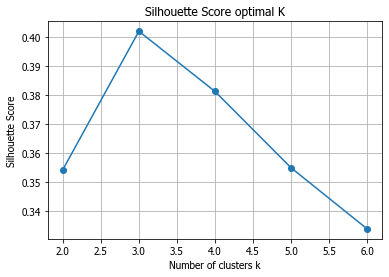

Optimal K =  3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


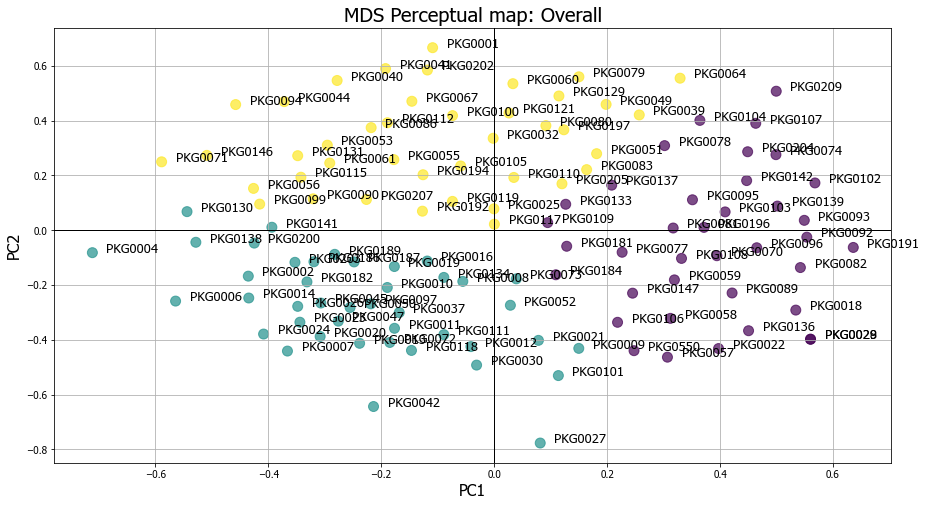

In [20]:
lb,cl = create_MDS_perceptual_map(cooc_matrix_jacc,'Overall', dissim[1])

In [29]:
pd.DataFrame({'x':lb.values, 'y':cl})

,x,y
0,PKG0001,2
1,PKG0002,1
2,PKG0004,1
3,PKG0006,1
4,PKG0007,1
...,...,...
116,PKG0204,0
117,PKG0205,2
118,PKG0207,2
119,PKG0209,0
